# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.<br>
The numbering of the algorithms, tables and page refer to the book.

## Chapter 7: Newton's method

### Algorithm 7.1: Machine epsilon (p. 184)

Objective: find the machine epsilon

In [4]:
def machineEpsilon():
    eps = 1.0
    while eps + 1.0 != 1.0:
        eps /= 2.0
    return eps

In [5]:
eps = machineEpsilon()
print("Machine epsilon: {}".format(eps))

Machine epsilon: 1.1102230246251565e-16


### Algorithm 7.2: Newton's method: one variable

In [6]:
# The function obj return a tuple containing the value of the function and its derivative
def newtonOneVariable(obj,x0,eps,maxiter=100):
    xk = x0
    (f,g) = obj(xk)
    k = 0
    iters = list()
    iters.append([k,xk,f,g])
    while abs(f) > eps and k < maxiter:
        xk = xk - f / g
        (f,g) = obj(xk)
        k += 1
        iters.append([k,xk,f,g])
    return (xk,iters)

Example: $F(x)=x^2-2$

In [7]:
def ex0703(x):
    f = x * x - 2.0
    g = 2.0 * x
    return (f,g)

Run the example with $x_0=2$ and $\varepsilon=10^{-15}$.

In [8]:
(root,iters) = newtonOneVariable(ex0703,2.0,1.0e-15)
print("x= {} F(x)={}".format(root,ex0703(root)[0]))    
    
    

x= 1.4142135623730951 F(x)=4.440892098500626e-16


Table 7.1 page 186

In [9]:
print("k\txk\t\tF(xk)\t\tF'(xk)")
for k in iters:
    print("{0}\t{1:+E}\t{2:+E}\t{3:+E}".format(*k))

k	xk		F(xk)		F'(xk)
0	+2.000000E+00	+2.000000E+00	+4.000000E+00
1	+1.500000E+00	+2.500000E-01	+3.000000E+00
2	+1.416667E+00	+6.944444E-03	+2.833333E+00
3	+1.414216E+00	+6.007305E-06	+2.828431E+00
4	+1.414214E+00	+4.510614E-12	+2.828427E+00
5	+1.414214E+00	+4.440892E-16	+2.828427E+00


We plot the value of the function as the iterations progress, excluding the starting point

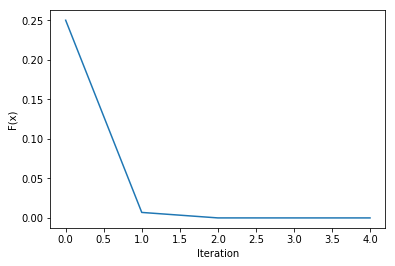

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
table= np.array(iters)
plt.xlabel("Iteration")
plt.ylabel("F(x)")
plt.plot(table[1:,2])
plt.show()

Another example: $F(x)=x-\sin(x)$

In [11]:
import numpy as np
def ex0704(x):
    f = x - np.sin(x)
    g = 1 - np.cos(x)
    return (f,g)

Run the example with $x_0=1$ and $\varepsilon=10^{-15}$.

In [12]:
(root,iters) = newtonOneVariable(ex0704,1.0,1.0e-15)
print("x= {} F(x)={}".format(root,ex0704(root)[0]))

x= 1.7074311939194665e-05 F(x)=8.296179498587519e-16


Table 7.2, p. 187. 

In [13]:
print("k\txk\t\tF(xk)\t\tF'(xk)")
for k in iters:
    print("{0}\t{1:+E}\t{2:+E}\t{3:+E}".format(*k))

k	xk		F(xk)		F'(xk)
0	+1.000000E+00	+1.585290E-01	+4.596977E-01
1	+6.551451E-01	+4.587079E-02	+2.070405E-01
2	+4.335904E-01	+1.345874E-02	+9.253683E-02
3	+2.881484E-01	+3.970948E-03	+4.122830E-02
4	+1.918323E-01	+1.174397E-03	+1.834346E-02
5	+1.278097E-01	+3.476843E-04	+8.156543E-03
6	+8.518323E-02	+1.029802E-04	+3.625898E-03
7	+5.678195E-02	+3.050772E-05	+1.611662E-03
8	+3.785260E-02	+9.038676E-06	+7.163242E-04
9	+2.523446E-02	+2.678041E-06	+3.183722E-04
10	+1.682280E-02	+7.934824E-07	+1.414999E-04
11	+1.121515E-02	+2.351044E-07	+6.288909E-05
12	+7.476748E-03	+6.966037E-08	+2.795075E-05
13	+4.984494E-03	+2.064008E-08	+1.242256E-05
14	+3.322995E-03	+6.115577E-09	+5.521142E-06
15	+2.215329E-03	+1.812022E-09	+2.453841E-06
16	+1.476886E-03	+5.368955E-10	+1.090596E-06
17	+9.845907E-04	+1.590801E-10	+4.847094E-07
18	+6.563938E-04	+4.713485E-11	+2.154264E-07
19	+4.375959E-04	+1.396588E-11	+9.574507E-08
20	+2.917306E-04	+4.138039E-12	+4.255336E-08
21	+1.944870E-04	+1.226086E-12	+1.891261E-08


We plot the value of the function as the iterations progress, excluding the starting point

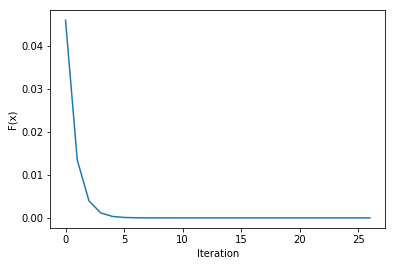

In [15]:
table = np.array(iters)
plt.xlabel("Iteration")
plt.ylabel("F(x)")
plt.plot(table[1:,2])
plt.show()

Another example: $F(x)=\arctan(x)$

In [16]:
def ex0705(x):
    f = np.arctan(x)
    g = 1.0 / (1.0 + x * x)
    return (f,g)

Run the example with $x_0=1.5$ and $\varepsilon=10^{-15}$. We set `maxiter` to 10, as the algorithm is not converging.

In [17]:
(root,iters) = newtonOneVariable(ex0705,1.5,1.0e-15,maxiter=10)
print("x= {} F(x)={}".format(root,ex0705(root)[0]))

x= 2.4539946374984955e+108 F(x)=1.5707963267948966


Table 7.3, page 188.

In [19]:
print("k\txk\t\tF(xk)\t\tF'(xk)")
for k in iters:
    print("{0}\t{1:+E}\t{2:+E}\t{3:+E}".format(*k))

k	xk		F(xk)		F'(xk)
0	+1.500000E+00	+9.827937E-01	+3.076923E-01
1	-1.694080E+00	-1.037546E+00	+2.584042E-01
2	+2.321127E+00	+1.164002E+00	+1.565526E-01
3	-5.114088E+00	-1.377695E+00	+3.682713E-02
4	+3.229568E+01	+1.539842E+00	+9.578441E-04
5	-1.575317E+03	-1.570162E+00	+4.029619E-07
6	+3.894976E+06	+1.570796E+00	+6.591594E-14
7	-2.383029E+13	-1.570796E+00	+1.760927E-27
8	+8.920280E+26	+1.570796E+00	+1.256733E-54
9	-1.249905E+54	-1.570796E+00	+6.400977E-109
10	+2.453995E+108	+1.570796E+00	+1.660553E-217


Plot the iterations, excluding the starting point. We observe the oscillations.

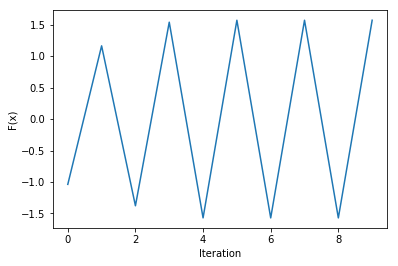

In [20]:
table = np.array(iters)
plt.xlabel("Iteration")
plt.ylabel("F(x)")
plt.plot(table[1:,2])
plt.show()

### Algorithm 7.3: Newton's method: $n$ variables

In [16]:
# The function f return a tuple containing the vector with the values of the functions 
# and its Jacobian in numpy array format
from scipy import linalg
def newtonNVariables(obj,x0,eps,maxiter=100):
    xk = x0
    (f,J) = obj(xk)
    k = 0
    iters = list()
    iters.append([k,xk,f,J])
    while linalg.norm(f) > eps and k < maxiter:
        # We need to enforce the column vector shape
        d = linalg.solve(J,-f).reshape(2,1)
        xk = xk + d
        (f,J) = obj(xk)
        k += 1
        iters.append([k,xk,f,J])
    return (xk,iters)

Example: $F(x)=\left(\begin{array}{c}(x_1+1)^2+ x_2^2 - 2 \\ e^{x_1} + x_2^3 - 2 \end{array}\right)$

In [17]:
# Note that the indices of array start at 0, not 1.
def ex0711(x):
    f1 = (x.item(0) + 1) * (x.item(0) + 1) + x.item(1) * x.item(1) - 2
    f2 = np.exp(x.item(0)) + x.item(1) * x.item(1) * x.item(1) - 2
    # Note the double brackets, as the vector must be a matrix with one column
    f = np.array([[f1],[f2]])
    J11 = 2 * (x.item(0) + 1)
    J12 = 2 * x.item(1)
    J21 = np.exp(x.item(0))
    J22 = 3 * x.item(1) * x.item(1)
    J = np.array([ [ J11, J12 ],[J21 ,J22 ]])
    return (f,J)

Run the example with $x_0= \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$ and $\varepsilon = 10^{-15}$

In [18]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x = np.array([[1,1]]).T
(root,iters) = newtonNVariables(ex0711,x,1.0e-15)
# Value at the solution
f = ex0711(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))


x= (-6.463024030322668e-17,1.0000000000000002) F(x)=(0.0,4.440892098500626e-16)


Table 7.4, page 195.

In [19]:
print("k\txk\t\tF(xk)\t\t||F(xk)||")
for k in range(len(iters)):
    print("{}\t{:+E}\t{:+E}\t{:+E}".format(iters[k][0],iters[k][1].item(0),iters[k][2].item(0),linalg.norm(iters[k][2])))
    print("  \t{:+E}\t{:+E}".format(iters[k][1].item(1),iters[k][2].item(1)))
    

k	xk		F(xk)		||F(xk)||
0	+1.000000E+00	+3.000000E+00	+3.457238E+00
  	+1.000000E+00	+1.718282E+00
1	+1.523592E-01	+7.566298E-01	+1.154709E+00
  	+1.195282E+00	+8.722749E-01
2	-1.083768E-02	+5.196844E-02	+1.140426E-01
  	+1.036111E+00	+1.015135E-01
3	-8.896646E-04	+1.294452E-03	+3.942330E-03
  	+1.001535E+00	+3.723756E-03
4	-1.370089E-06	+3.137249E-06	+8.079986E-06
  	+1.000003E+00	+7.446062E-06
5	-5.538412E-12	+1.051292E-11	+2.883112E-11
  	+1.000000E+00	+2.684608E-11
6	-6.463024E-17	+0.000000E+00	+4.440892E-16
  	+1.000000E+00	+4.440892E-16


We plot the evolution of the norm of the function with the iterations.

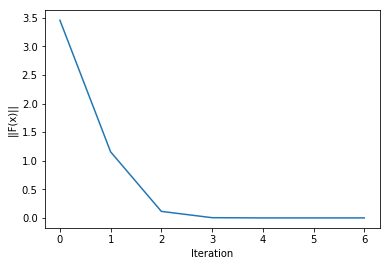

In [20]:
norm = [linalg.norm(iters[k][2]) for k in range(len(iters))]
plt.xlabel("Iteration")
plt.ylabel("||F(x)||")
plt.plot(norm)
plt.show()

Example: $F(x)=\left(\begin{array}{c}x_1^3 - 3 x_1 x_2^2 -1 \\ x_2^3 - 3x_1^2 x_2\end{array}\right)$

In [21]:
# Note that the indices of array start at 0, not 1.
def ex0712(x):
    # Note the double brackets, as the vector must be a matrix with one column
    f = np.array([[x.item(0)**3 - 3 * x.item(0) * x.item(1)**2  - 1.0],[x.item(1)**3 - 3 * x.item(0)**2 * x.item(1)]])
    J = np.array([ [ 3 * x.item(0)**2 - 3 * x.item(1)**2, -6 * x.item(0) * x.item(1) ],[-6 *x.item(0) * x.item(1) ,3* x.item(1)**2 - 3 * x.item(0)**2]])
    return (f,J)

Run the example with $x_0= \left(\begin{array}{c} 1 \\ 1 \end{array}\right)$ and $\varepsilon = 10^{-15}$

In [22]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x = np.array([[1,1]]).T
(root,iters) = newtonNVariables(ex0712,x,1.0e-15)
# Valur at the solution
f = ex0712(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))

x= (1.0,4.930380657631324e-31) F(x)=(0.0,-1.4791141972893971e-30)


Run the example with $x_0= \left(\begin{array}{c} -1 \\ -1 \end{array}\right)$ and $\varepsilon = 10^{-15}$

In [4]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x = np.array([[-1,-1]]).T
(root,iters) = newtonNVariables(ex0712,x,1.0e-15)
# Valur at the solution
f = ex0712(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))

NameError: name 'np' is not defined

Run the example with $x_0= \left(\begin{array}{c} 0 \\ 1 \end{array}\right)$ and $\varepsilon = 10^{-15}$


In [21]:
# The .T represents transpose, to obtain a column vector. Note the double brackets syntax to emphasize 
# that it is a matrix with only one column
x = np.array([[0,1]]).T
(root,iters) = newtonNVariables(ex0712,x,1.0e-15)
# Valur at the solution
f = ex0712(root)[0]
print("x= ({},{}) F(x)=({},{})".format(root.item(0),root.item(1),f.item(0),f.item(1)))

NameError: name 'newtonNVariables' is not defined